# How to create h5ad files from count matrix using scanpy

In [ ]:
pip install scanpy pandas numpy scipy

In [8]:
import scanpy as sc
import pandas as pd
import os
from tqdm import tqdm

# Base path for your samples
base_path = "examples/bj_fibroblasts_gse100344_D8"
output_file = "final_v3.h5ad"

# List to store individual AnnData objects
adatas = []

# Process each sample
for i in tqdm(range(1, 97), desc="Processing samples"):
    sample_path = f"{base_path}/BJ_fibroblasts_8_{i}"
    matrix_file = f"{sample_path}/matrix.mtx"
    features_file = f"{sample_path}/features.tsv"
    
    # Check if files exist
    if not (os.path.exists(matrix_file) and os.path.exists(features_file)):
        print(f"Warning: Files not found for sample {i}. Skipping.")
        continue
    
    # Read the matrix file
    adata = sc.read_mtx(matrix_file).T  # Transpose to have cells as columns
    
    # Read the features file
    features = pd.read_csv(features_file, sep='\t', header=None, names=['gene_id', 'gene_symbol', 'feature_type'])
    
    # Set the var_names (index) to gene_symbol
    adata.var_names = features['gene_id'].values
    
    # Add gene_id as a column in var
    adata.var['gene_symbol'] = features['gene_symbol'].values
    
    # Ensure the var_names (gene symbols) are unique
    adata.var_names_make_unique()
    
    # Add sample information
    adata.obs['sample'] = f'BJ_fibroblasts_8_{i}'
    
    # Add Celltype information
    adata.obs['Celltype'] = 'BJ Fibroblasts'
    
    adatas.append(adata)

# Concatenate all AnnData objects
if adatas:
    combined_adata = adatas[0].concatenate(adatas[1:], join='outer')
    
    # Ensure 'Celltype' is in obs
    if 'Celltype' not in combined_adata.obs.columns:
        combined_adata.obs['Celltype'] = 'BJ Fibroblasts'
    
    # Save as h5ad file
    combined_adata.write_h5ad(output_file)
    print(f"Saved combined h5ad file to {output_file}")
    
    # Print some statistics
    print(f"Combined data shape: {combined_adata.shape}")
    print(f"Number of samples: {combined_adata.obs['sample'].nunique()}")
    print(f"Number of unique genes: {combined_adata.var_names.nunique()}")
    print("Celltype distribution:")
    print(combined_adata.obs['Celltype'].value_counts())
    
    # Verify var structure
    print("\nFirst few rows of var DataFrame:")
    print(combined_adata.var.head())
    
    # Verify obs structure
    print("\nFirst few rows of obs DataFrame:")
    print(combined_adata.obs.head())
else:
    print("No valid samples found. Please check your file paths.")

Processing samples: 100%|████████████████████████████████████████████████████████████████| 96/96 [00:04<00:00, 21.91it/s]
/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_99528/3543927161.py:49: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = adatas[0].concatenate(adatas[1:], join='outer')


Saved combined h5ad file to final_v3.h5ad
Combined data shape: (96, 63140)
Number of samples: 96
Number of unique genes: 63140
Celltype distribution:
Celltype
BJ Fibroblasts    96
Name: count, dtype: int64

First few rows of var DataFrame:
                     gene_symbol
ENSG00000228037  ENSG00000228037
ENSG00000142611           PRDM16
ENSG00000284616  ENSG00000284616
ENSG00000157911            PEX10
ENSG00000260972  ENSG00000260972

First few rows of obs DataFrame:
                 sample        Celltype batch
0-0  BJ_fibroblasts_8_1  BJ Fibroblasts     0
0-1  BJ_fibroblasts_8_2  BJ Fibroblasts     1
0-2  BJ_fibroblasts_8_3  BJ Fibroblasts     2
0-3  BJ_fibroblasts_8_4  BJ Fibroblasts     3
0-4  BJ_fibroblasts_8_5  BJ Fibroblasts     4


In [69]:
import scanpy as sc
import pandas as pd

# Path to your files
matrix_file = "examples/bj_fibroblasts_gse100344_D8/BJ_fibroblasts_8_1/matrix.mtx"
features_file = "examples/bj_fibroblasts_gse100344_D8/BJ_fibroblasts_8_1/features.tsv"
output_file = "output.h5ad"

# Read the matrix file
adata = sc.read_mtx(matrix_file).T  # Transpose to have cells as columns

# Read the features file
features = pd.read_csv(features_file, sep='\t', header=None, names=['gene_id', 'gene_symbol', 'feature_type'])

# Set the var_names (index) to gene_id
adata.var_names = features['gene_symbol'].values

# Add gene_symbol as a column in var
adata.var['gene_symbol'] = features['gene_symbol'].values


# Ensure the var_names (gene_ids) are unique
adata.var_names_make_unique()

# Save as h5ad file
adata.write_h5ad(output_file)

print(f"Saved h5ad file to {output_file}")

# Verification
print("\nVerification:")
print(adata)
print(f"\nNumber of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print("\nFirst few gene IDs (index):")
print(adata.var_names[:10])
print("\nFirst few rows of var DataFrame:")
print(adata.var.head())

/opt/miniconda3/envs/jupyter/lib/python3.12/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


Saved h5ad file to output.h5ad

Verification:
AnnData object with n_obs × n_vars = 1 × 63140
    var: 'gene_symbol'

Number of cells: 1
Number of genes: 63140

First few gene IDs (index):
Index(['ENSG00000228037', 'PRDM16', 'ENSG00000284616', 'PEX10',
       'ENSG00000260972', 'RPL21P21', 'LINC01345', 'EEF1DP6', 'PEX14',
       'LINC01646'],
      dtype='object')

First few rows of var DataFrame:
                     gene_symbol
ENSG00000228037  ENSG00000228037
PRDM16                    PRDM16
ENSG00000284616  ENSG00000284616
PEX10                      PEX10
ENSG00000260972  ENSG00000260972


In [70]:
import scanpy as sc

# Path to your h5ad file
h5ad_file = "output.h5ad"

# Read the h5ad file
adata = sc.read_h5ad(h5ad_file)

# Print basic information about the AnnData object
print(adata)

# Check the number of observations (cells) and variables (genes)
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")

# Display the first few gene IDs (index)
print("\nFirst few gene IDs (index):")
print(adata.var_names[:10])

# Display the first few rows of the var DataFrame
print("\nFirst few rows of var DataFrame:")
print(adata.var.head())

# Check if 'gene_symbol' and 'feature_type' columns are present
if 'gene_symbol' in adata.var.columns and 'feature_type' in adata.var.columns:
    print("\n'gene_symbol' and 'feature_type' columns are present in var DataFrame")
else:
    print("\nWarning: 'gene_symbol' or 'feature_type' columns are missing")

# Display some basic statistics of the expression matrix
print("\nExpression matrix statistics:")
print(f"Total count: {adata.X.sum()}")
print(f"Mean expression: {adata.X.mean()}")
print(f"Max expression value: {adata.X.max()}")

AnnData object with n_obs × n_vars = 1 × 63140
    var: 'gene_symbol'
Number of cells: 1
Number of genes: 63140

First few gene IDs (index):
Index(['ENSG00000228037', 'PRDM16', 'ENSG00000284616', 'PEX10',
       'ENSG00000260972', 'RPL21P21', 'LINC01345', 'EEF1DP6', 'PEX14',
       'LINC01646'],
      dtype='object')

First few rows of var DataFrame:
                     gene_symbol
ENSG00000228037  ENSG00000228037
PRDM16                    PRDM16
ENSG00000284616  ENSG00000284616
PEX10                      PEX10
ENSG00000260972  ENSG00000260972


Expression matrix statistics:
Total count: 239375.0
Mean expression: 3.7911782264709473
Max expression value: 6650.0


In [71]:
import scanpy as sc
import pandas as pd
import numpy as np

# Path to your h5ad file
h5ad_file = "output.h5ad"

# Read the h5ad file
adata = sc.read_h5ad(h5ad_file)

# Create a DataFrame with gene expression data
gene_exp_df = pd.DataFrame(adata.X.toarray().T, index=adata.var_names, columns=adata.obs_names)

# Add gene symbols to the DataFrame
gene_exp_df['gene_symbol'] = adata.var['gene_symbol']

# Group by gene symbol and sum the expression values
# This step is necessary if multiple gene IDs map to the same gene symbol
gene_exp_by_symbol = gene_exp_df.groupby('gene_symbol').sum()

# Sort genes by total expression (descending order)
gene_exp_sorted = gene_exp_by_symbol.sort_values(gene_exp_by_symbol.columns[0], ascending=False)

# Display the top 20 most expressed genes
print("Top 20 most expressed genes:")
print(gene_exp_sorted.head(20))

# Function to search for a specific gene symbol
def search_gene(gene_symbol):
    if gene_symbol in gene_exp_by_symbol.index:
        return gene_exp_by_symbol.loc[gene_symbol]
    else:
        return f"Gene symbol '{gene_symbol}' not found."

# Example usage:
print("\nExpression for GAPDH:")
print(search_gene('GAPDH'))

# Save the full expression data to a CSV file
gene_exp_sorted.to_csv('gene_expression_by_symbol.csv')
print("\nFull gene expression data saved to 'gene_expression_by_symbol.csv'")

Top 20 most expressed genes:
                  0
gene_symbol        
MT-RNR2      6650.0
MT-RNR1      5189.0
MT-CO2       3482.0
EEF1A1       3466.0
MT-CYB       3116.0
MT-ND4       2330.0
S100A4       2321.0
FTL          2195.0
MT-ATP6      1898.0
RPS3         1740.0
RPLP1        1648.0
GAPDH        1608.0
ANXA2        1593.0
RPLP0        1577.0
RPL13A       1449.0
RPL3         1408.0
RPL10        1273.0
RPS19        1234.0
RPS18        1218.0
RPL8         1206.0

Expression for GAPDH:
0    1608.0
Name: GAPDH, dtype: float32

Full gene expression data saved to 'gene_expression_by_symbol.csv'


/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_65895/2692997082.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gene_exp_by_symbol = gene_exp_df.groupby('gene_symbol').sum()


# Visualize AnnData

In [9]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to your h5ad file
h5ad_file = "GSE100344_scGPT_ready_with_gene_names.h5ad"

# Read the h5ad file
adata = sc.read_h5ad(h5ad_file)

# 1. Basic information
print("1. Basic Information:")
print(adata)
print(f"\nNumber of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")

# 2. Explore var (gene) annotations
print("\n2. Gene Annotations:")
print(adata.var.head())
print("\nColumns in var:")
print(adata.var.columns)

# 3. Explore obs (cell) annotations
print("\n3. Cell Annotations:")
print(adata.obs.head())
print("\nColumns in obs:")
print(adata.obs.columns)

# 4. Expression matrix properties
print("\n4. Expression Matrix Properties:")
print(f"Matrix type: {type(adata.X)}")
print(f"Data type: {adata.X.dtype}")
print(f"Min value: {adata.X.min()}")
print(f"Max value: {adata.X.max()}")
print(f"Mean value: {adata.X.mean()}")

# 5. Top expressed genes
print("\n5. Top 20 Expressed Genes:")
gene_sums = pd.DataFrame(adata.X.sum(axis=0).A1, index=adata.var_names, columns=['total_counts'])
gene_sums['gene_symbol'] = adata.var['gene_symbol']
top_genes = gene_sums.sort_values('total_counts', ascending=False).head(20)
print(top_genes)

# 6. Visualizations
plt.figure(figsize=(12, 6))

# 6.1 Distribution of gene expression
plt.subplot(1, 2, 1)
sns.histplot(gene_sums['total_counts'], kde=True)
plt.title('Distribution of Gene Expression')
plt.xlabel('Total Counts')
plt.ylabel('Frequency')

# 6.2 Top 20 expressed genes
plt.subplot(1, 2, 2)
sns.barplot(x='total_counts', y='gene_symbol', data=top_genes.sort_values('total_counts'))
plt.title('Top 20 Expressed Genes')
plt.xlabel('Total Counts')
plt.tight_layout()
plt.savefig('gene_expression_overview.png')
print("\nSaved gene expression overview plot to 'gene_expression_overview.png'")

plt.close()  # Close the plot to free up memory

1. Basic Information:
AnnData object with n_obs × n_vars = 475 × 25265
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'log1p_mean_counts', 'log1p_total_counts', 'gene_name'
    uns: 'cell_line_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Number of cells: 475
Number of genes: 25265

2. Gene Annotations:
                 n_cells     mt  n_cells_by_counts  mean_counts  \
Geneid                                                            
ENSG00000157911      

AttributeError: 'numpy.ndarray' object has no attribute 'A1'

In [ ]:
import scanpy as sc
import numpy as np
import scipy

# Load the data
adata = sc.read_h5ad("output.h5ad")

print("AnnData structure:")
print(adata)

print("\nShape of adata.X:", adata.X.shape)
print("Number of genes (adata.n_vars):", adata.n_vars)
print("Number of cells (adata.n_obs):", adata.n_obs)

print("\nFirst few var names:")
print(adata.var_names[:10])

print("\nColumns in var:")
print(adata.var.columns)

if scipy.sparse.issparse(adata.X):
    print("\nadata.X is sparse. Density:", adata.X.nnz / (adata.X.shape[0] * adata.X.shape[1]))
else:
    print("\nadata.X is dense")

print("\nSample of adata.X:")
print(adata.X[:5, :5])


Saved preprocessed gene expression overview plot to 'gene_expression_overview_preprocessed.png'

Top 20 Expressed Genes:
                 mean_expression  n_cells_expressed
ENSG00000210082         5.630519                  1
ENSG00000211459         5.383452                  1
ENSG00000198712         4.986767                  1
ENSG00000156508         4.982193                  1
ENSG00000198727         4.876512                  1
ENSG00000198886         4.588398                  1
ENSG00000196154         4.584568                  1
ENSG00000087086         4.529337                  1
ENSG00000198899         4.385643                  1
ENSG00000149273         4.299858                  1
ENSG00000137818         4.246292                  1
ENSG00000111640         4.222077                  1
ENSG00000182718         4.212843                  1
ENSG00000089157         4.202899                  1
ENSG00000142541         4.119568                  1
ENSG00000100316         4.091337              

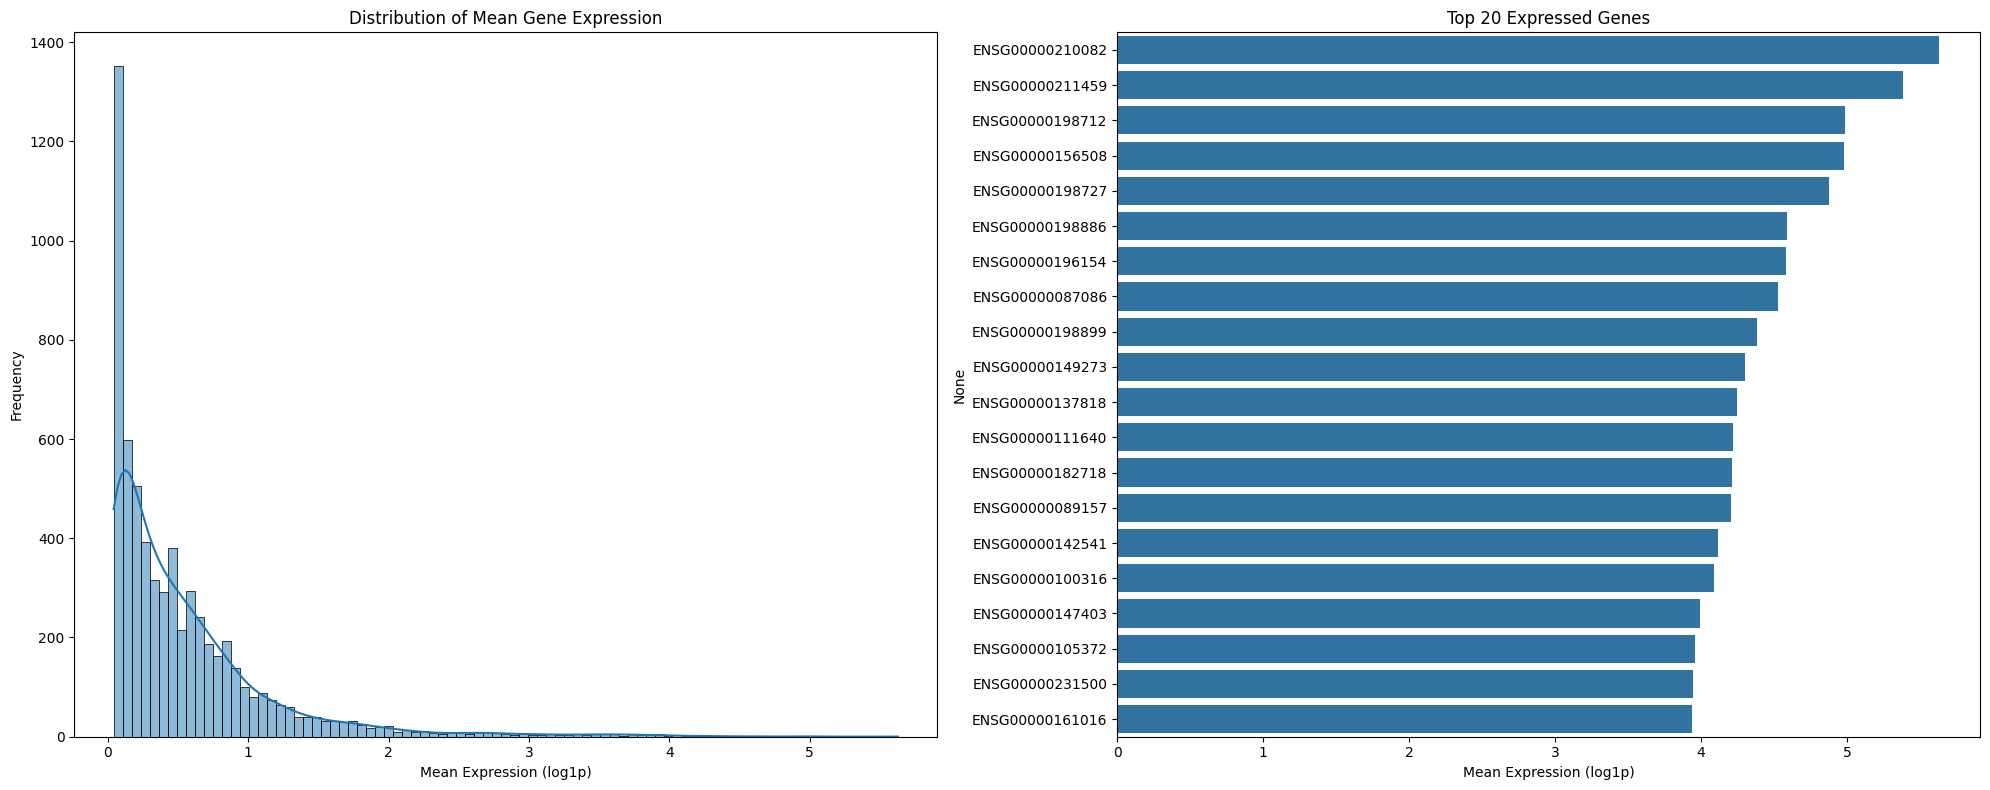

In [20]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
adata = sc.read_h5ad("output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate gene statistics
if scipy.sparse.issparse(adata.X):
    mean_expression = adata.X.mean(axis=0).A1
    cells_expressed = (adata.X > 0).sum(axis=0).A1
else:
    mean_expression = adata.X.mean(axis=0)
    cells_expressed = (adata.X > 0).sum(axis=0)

adata.var['mean_expression'] = mean_expression
adata.var['n_cells_expressed'] = cells_expressed

# Sort genes by mean expression
top_genes = adata.var.sort_values('mean_expression', ascending=False).head(20)

# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Distribution of gene expression
sns.histplot(adata.var['mean_expression'], kde=True, ax=ax1)
ax1.set_title('Distribution of Mean Gene Expression')
ax1.set_xlabel('Mean Expression (log1p)')
ax1.set_ylabel('Frequency')

# Top 20 expressed genes
sns.barplot(x='mean_expression', y=top_genes.index, data=top_genes, ax=ax2)
ax2.set_title('Top 20 Expressed Genes')
ax2.set_xlabel('Mean Expression (log1p)')

plt.tight_layout()
plt.savefig('gene_expression_overview_preprocessed.png')
print("\nSaved preprocessed gene expression overview plot to 'gene_expression_overview_preprocessed.png'")

# Print top genes info
print("\nTop 20 Expressed Genes:")
print(top_genes[['mean_expression', 'n_cells_expressed']])

# generate h5ad file with all samples (96 in the case of GSE100344)

In [21]:
import scanpy as sc
import pandas as pd
import os
from tqdm import tqdm

# Base path for your samples
base_path = "examples/bj_fibroblasts_gse100344_D8"
output_file = "combined_output.h5ad"

# List to store individual AnnData objects
adatas = []

# Iterate through samples
for i in tqdm(range(1, 97), desc="Processing samples"):
    sample_path = f"{base_path}/BJ_fibroblasts_8_{i}"
    matrix_file = f"{sample_path}/matrix.mtx"
    features_file = f"{sample_path}/features.tsv"
    
    # Check if files exist
    if not (os.path.exists(matrix_file) and os.path.exists(features_file)):
        print(f"Warning: Files not found for sample {i}. Skipping.")
        continue
    
    # Read the matrix file
    adata = sc.read_mtx(matrix_file).T  # Transpose to have cells as columns
    
    # Read the features file
    features = pd.read_csv(features_file, sep='\t', header=None, names=['gene_id', 'gene_symbol', 'feature_type'])
    
    # Set the var_names (index) to gene_id
    adata.var_names = features['gene_id'].values
    
    # Add gene_symbol as a column in var
    adata.var['gene_symbol'] = features['gene_symbol'].values
    
    # Ensure the var_names (gene_ids) are unique
    adata.var_names_make_unique()
    
    # Add sample information
    adata.obs['sample'] = f'BJ_fibroblasts_8_{i}'
    
    adatas.append(adata)

# Concatenate all AnnData objects
if adatas:
    combined_adata = adatas[0].concatenate(adatas[1:], join='outer')
    
    # Save as h5ad file
    combined_adata.write_h5ad(output_file)
    print(f"Saved combined h5ad file to {output_file}")
    
    # Print some statistics
    print(f"Combined data shape: {combined_adata.shape}")
    print(f"Number of samples: {combined_adata.obs['sample'].nunique()}")
else:
    print("No valid samples found. Please check your file paths.")

Processing samples: 100%|████████████████████████████████████████████████████████████████| 96/96 [00:04<00:00, 20.88it/s]
/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_65895/3957124088.py:46: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = adatas[0].concatenate(adatas[1:], join='outer')


Saved combined h5ad file to combined_output.h5ad
Combined data shape: (96, 63140)
Number of samples: 96


# Visualize combined h5ad with all samples

/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_65895/3611234809.py:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



Saved multi-sample gene expression overview plot to 'gene_expression_overview_multi_sample.png'

Top 20 Expressed Genes (All Samples Combined):
                gene_symbol  mean_expression  n_cells_expressed
ENSG00000156508      EEF1A1         4.991411                 96
ENSG00000210082     MT-RNR2         4.919792                 95
ENSG00000182718       ANXA2         4.430544                 96
ENSG00000198712      MT-CO2         4.280600                 96
ENSG00000211459     MT-RNR1         4.005096                 96
ENSG00000198886      MT-ND4         3.970011                 95
ENSG00000075624        ACTB         3.968347                 95
ENSG00000111640       GAPDH         3.913458                 96
ENSG00000089157       RPLP0         3.889854                 96
ENSG00000198804      MT-CO1         3.874301                 95
ENSG00000198727      MT-CYB         3.872036                 96
ENSG00000184009       ACTG1         3.820934                 95
ENSG00000134333        

AttributeError: 'numpy.float32' object has no attribute 'A1'

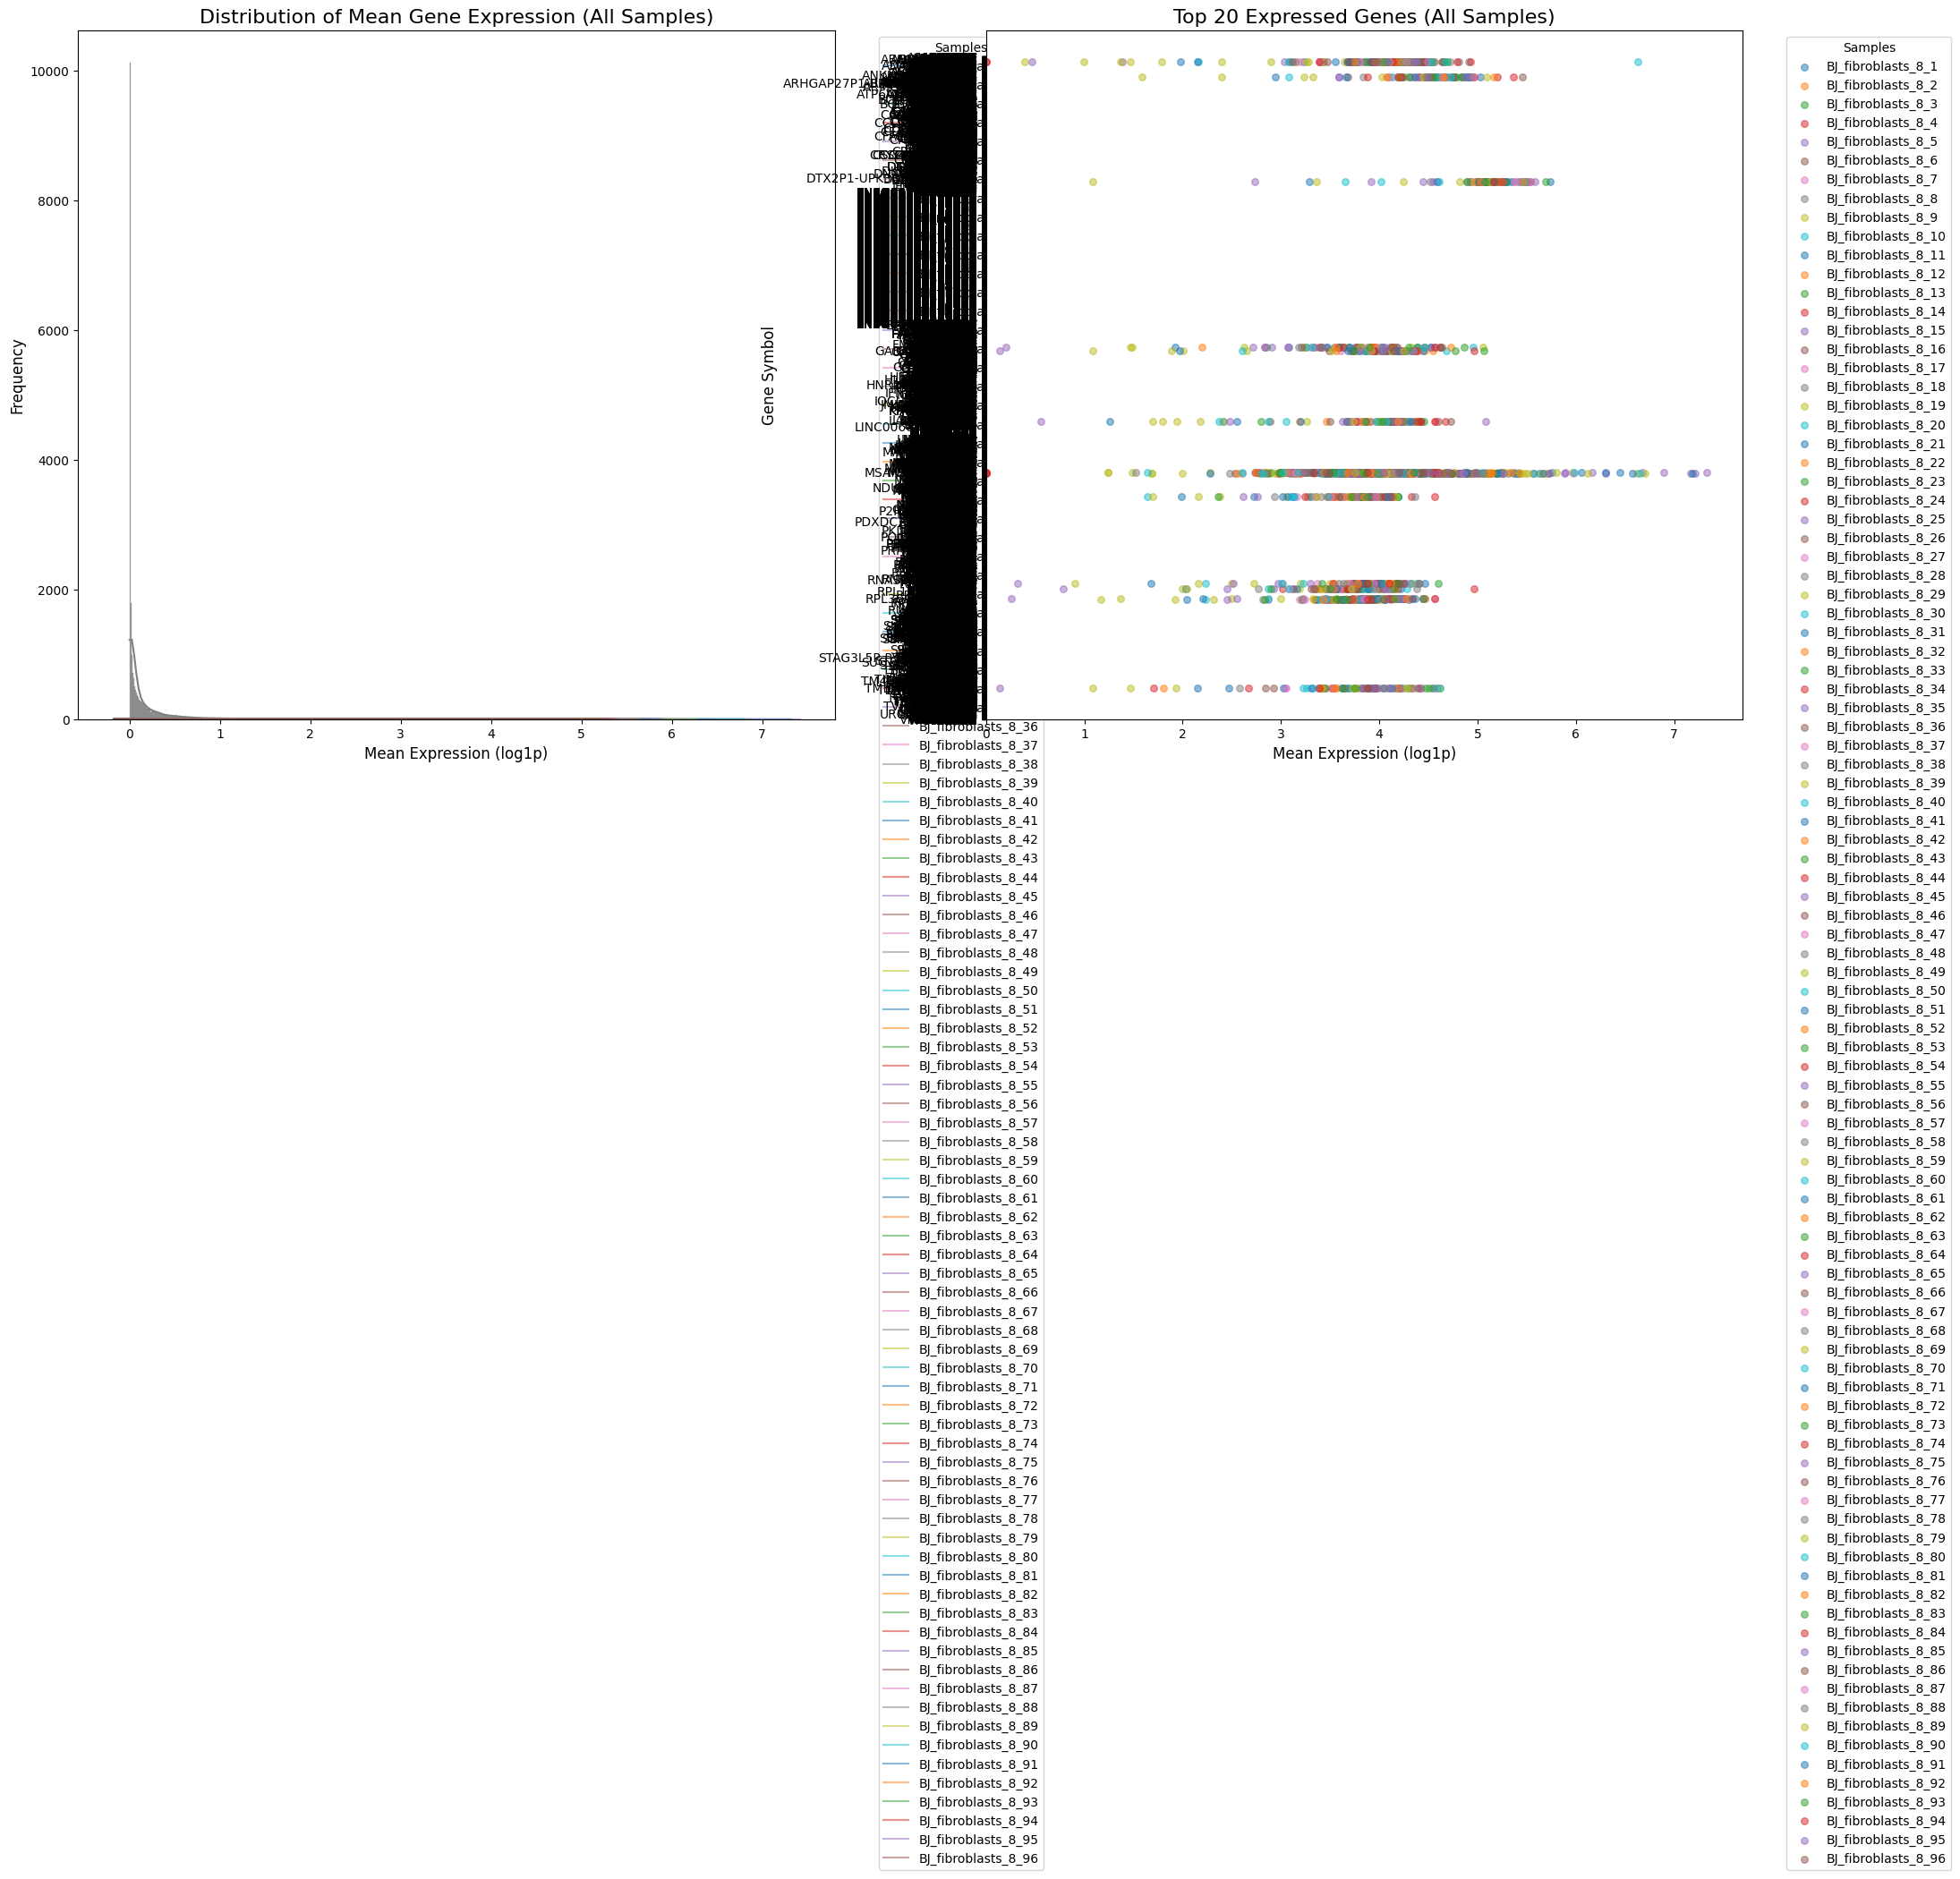

In [23]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse

# Load the data
adata = sc.read_h5ad("combined_output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate gene statistics for all samples combined
if sparse.issparse(adata.X):
    mean_expression = adata.X.mean(axis=0).A1
    cells_expressed = (adata.X > 0).sum(axis=0).A1
else:
    mean_expression = adata.X.mean(axis=0)
    cells_expressed = (adata.X > 0).sum(axis=0)

adata.var['mean_expression'] = mean_expression
adata.var['n_cells_expressed'] = cells_expressed

# Sort genes by mean expression
top_genes = adata.var.sort_values('mean_expression', ascending=False).head(20)

# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Distribution of gene expression
sns.histplot(adata.var['mean_expression'], kde=True, ax=ax1, color='gray', alpha=0.5)
ax1.set_title('Distribution of Mean Gene Expression (All Samples)', fontsize=16)
ax1.set_xlabel('Mean Expression (log1p)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Add lines for each sample
for sample in adata.obs['sample'].unique():
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        sample_mean = sample_data.X.mean(axis=0).A1
    else:
        sample_mean = sample_data.X.mean(axis=0)
    sns.kdeplot(sample_mean, ax=ax1, alpha=0.5, label=sample)

ax1.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')

# Top 20 expressed genes
sns.barplot(x='mean_expression', y='gene_symbol', data=top_genes, ax=ax2, color='gray')
ax2.set_title('Top 20 Expressed Genes (All Samples)', fontsize=16)
ax2.set_xlabel('Mean Expression (log1p)', fontsize=12)
ax2.set_ylabel('Gene Symbol', fontsize=12)

# Add points for each sample
for i, sample in enumerate(adata.obs['sample'].unique()):
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        sample_mean = sample_data.X.mean(axis=0).A1
    else:
        sample_mean = sample_data.X.mean(axis=0)
    sample_top_genes = pd.DataFrame({'gene_symbol': adata.var['gene_symbol'], 'mean_expression': sample_mean})
    sample_top_genes = sample_top_genes.loc[sample_top_genes['gene_symbol'].isin(top_genes['gene_symbol'])]
    ax2.scatter(sample_top_genes['mean_expression'], sample_top_genes['gene_symbol'], 
                alpha=0.5, label=sample, s=30)

ax2.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('gene_expression_overview_multi_sample.png', dpi=300, bbox_inches='tight')
print("\nSaved multi-sample gene expression overview plot to 'gene_expression_overview_multi_sample.png'")

# Print top genes info
print("\nTop 20 Expressed Genes (All Samples Combined):")
print(top_genes[['gene_symbol', 'mean_expression', 'n_cells_expressed']])

# Calculate and print sample-specific statistics for top genes
print("\nSample-specific statistics for top genes:")
for gene in top_genes['gene_symbol']:
    print(f"\nGene: {gene}")
    for sample in adata.obs['sample'].unique():
        sample_data = adata[adata.obs['sample'] == sample]
        gene_exp = sample_data[:, adata.var['gene_symbol'] == gene].X
        if sparse.issparse(gene_exp):
            mean_exp = gene_exp.mean().A1[0]
            cells_exp = (gene_exp > 0).sum().A1[0]
        else:
            mean_exp = gene_exp.mean()
            cells_exp = (gene_exp > 0).sum()
        print(f"  {sample}: Mean Expression = {mean_exp:.4f}, Cells Expressed = {cells_exp}")

/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_65895/3752393128.py:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



Saved multi-sample gene expression overview plot to 'gene_expression_overview_multi_sample.png'

Top 20 Expressed Genes (All Samples Combined):
                gene_symbol  mean_expression  n_cells_expressed
ENSG00000156508      EEF1A1         4.991411                 96
ENSG00000210082     MT-RNR2         4.919792                 95
ENSG00000182718       ANXA2         4.430544                 96
ENSG00000198712      MT-CO2         4.280600                 96
ENSG00000211459     MT-RNR1         4.005096                 96
ENSG00000198886      MT-ND4         3.970011                 95
ENSG00000075624        ACTB         3.968347                 95
ENSG00000111640       GAPDH         3.913458                 96
ENSG00000089157       RPLP0         3.889854                 96
ENSG00000198804      MT-CO1         3.874301                 95
ENSG00000198727      MT-CYB         3.872036                 96
ENSG00000184009       ACTG1         3.820934                 95
ENSG00000134333        

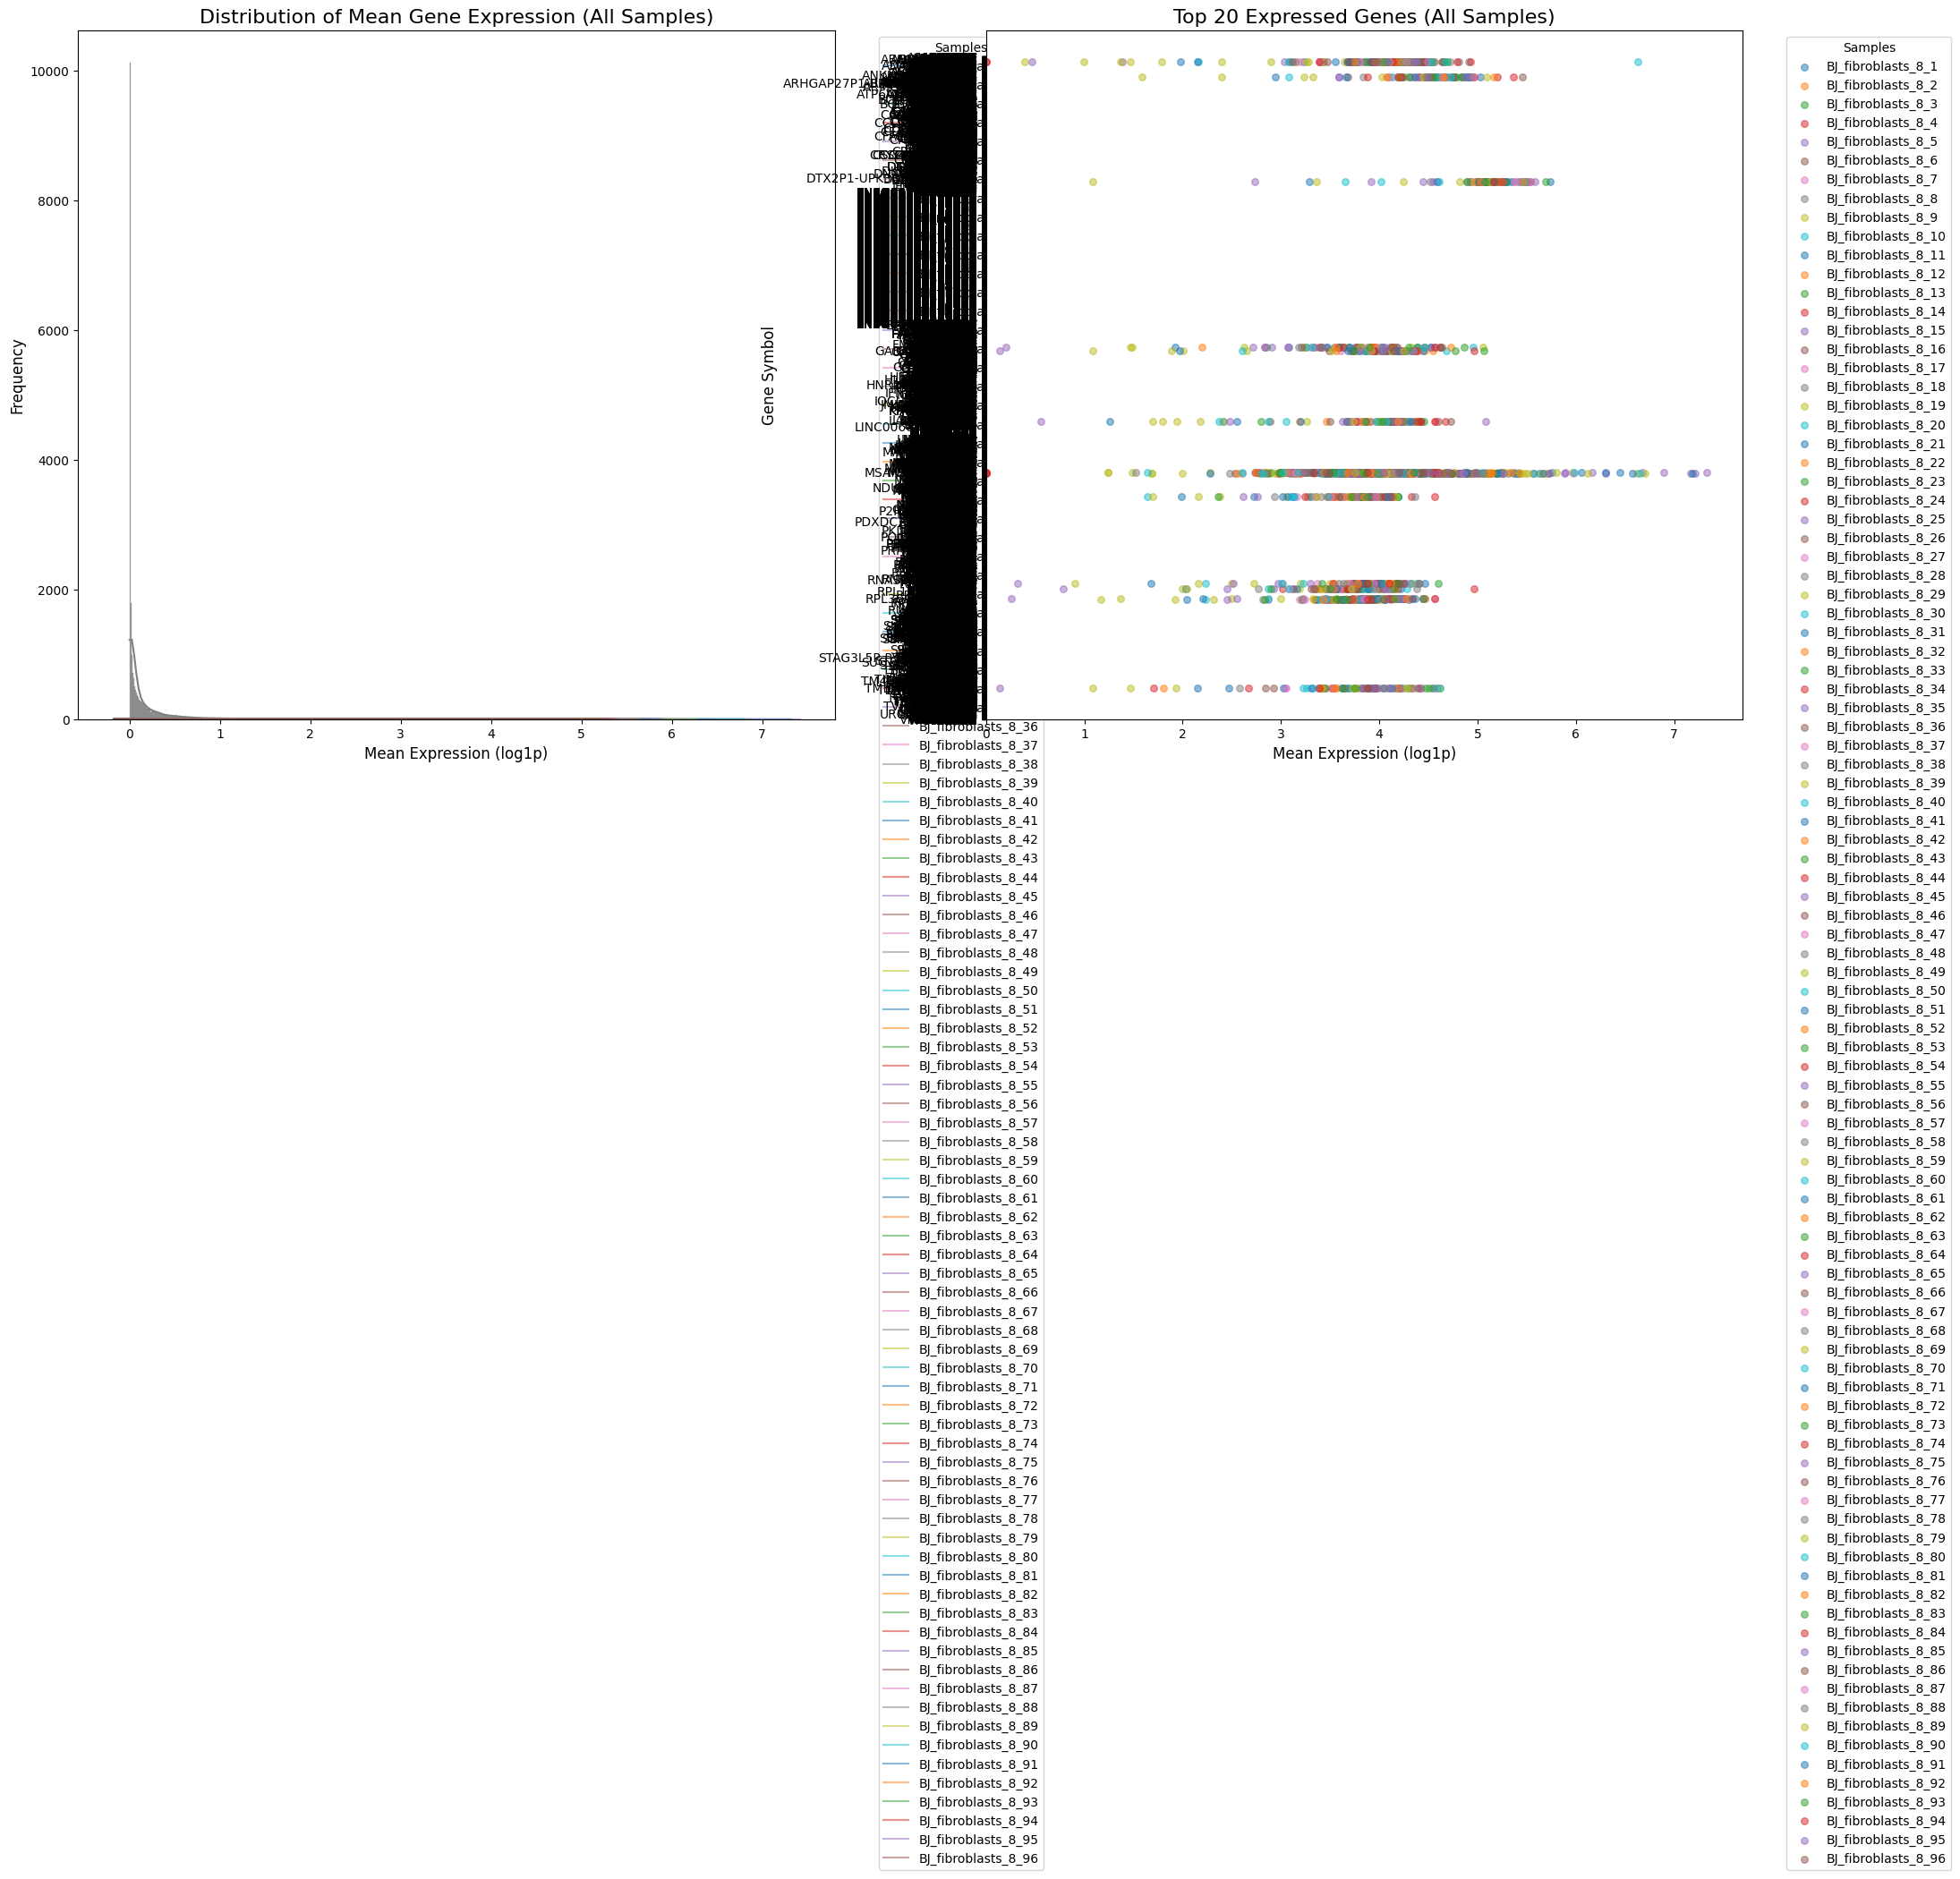

In [24]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse

# Load the data
adata = sc.read_h5ad("combined_output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate gene statistics for all samples combined
if sparse.issparse(adata.X):
    mean_expression = adata.X.mean(axis=0).A1
    cells_expressed = (adata.X > 0).sum(axis=0).A1
else:
    mean_expression = adata.X.mean(axis=0)
    cells_expressed = (adata.X > 0).sum(axis=0)

adata.var['mean_expression'] = mean_expression
adata.var['n_cells_expressed'] = cells_expressed

# Sort genes by mean expression
top_genes = adata.var.sort_values('mean_expression', ascending=False).head(20)

# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Distribution of gene expression
sns.histplot(adata.var['mean_expression'], kde=True, ax=ax1, color='gray', alpha=0.5)
ax1.set_title('Distribution of Mean Gene Expression (All Samples)', fontsize=16)
ax1.set_xlabel('Mean Expression (log1p)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Add lines for each sample
for sample in adata.obs['sample'].unique():
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        sample_mean = sample_data.X.mean(axis=0).A1
    else:
        sample_mean = sample_data.X.mean(axis=0)
    sns.kdeplot(sample_mean, ax=ax1, alpha=0.5, label=sample)

ax1.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')

# Top 20 expressed genes
sns.barplot(x='mean_expression', y='gene_symbol', data=top_genes, ax=ax2, color='gray')
ax2.set_title('Top 20 Expressed Genes (All Samples)', fontsize=16)
ax2.set_xlabel('Mean Expression (log1p)', fontsize=12)
ax2.set_ylabel('Gene Symbol', fontsize=12)

# Add points for each sample
for i, sample in enumerate(adata.obs['sample'].unique()):
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        sample_mean = sample_data.X.mean(axis=0).A1
    else:
        sample_mean = sample_data.X.mean(axis=0)
    sample_top_genes = pd.DataFrame({'gene_symbol': adata.var['gene_symbol'], 'mean_expression': sample_mean})
    sample_top_genes = sample_top_genes.loc[sample_top_genes['gene_symbol'].isin(top_genes['gene_symbol'])]
    ax2.scatter(sample_top_genes['mean_expression'], sample_top_genes['gene_symbol'], 
                alpha=0.5, label=sample, s=30)

ax2.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('gene_expression_overview_multi_sample.png', dpi=300, bbox_inches='tight')
print("\nSaved multi-sample gene expression overview plot to 'gene_expression_overview_multi_sample.png'")

# Print top genes info
print("\nTop 20 Expressed Genes (All Samples Combined):")
print(top_genes[['gene_symbol', 'mean_expression', 'n_cells_expressed']])

# Calculate and print sample-specific statistics for top genes
print("\nSample-specific statistics for top genes:")
for gene in top_genes['gene_symbol']:
    print(f"\nGene: {gene}")
    for sample in adata.obs['sample'].unique():
        sample_data = adata[adata.obs['sample'] == sample]
        gene_exp = sample_data[:, adata.var['gene_symbol'] == gene].X
        
        if sparse.issparse(gene_exp):
            mean_exp = gene_exp.mean()
            cells_exp = (gene_exp > 0).sum()
        else:
            mean_exp = np.mean(gene_exp)
            cells_exp = np.sum(gene_exp > 0)
        
        # Handle case where gene_exp is a single value
        if np.isscalar(mean_exp):
            mean_exp = float(mean_exp)
        else:
            mean_exp = mean_exp[0] if isinstance(mean_exp, np.ndarray) else mean_exp.A1[0]
        
        if np.isscalar(cells_exp):
            cells_exp = int(cells_exp)
        else:
            cells_exp = cells_exp[0] if isinstance(cells_exp, np.ndarray) else cells_exp.A1[0]
        
        print(f"  {sample}: Mean Expression = {mean_exp:.4f}, Cells Expressed = {cells_exp}")


Saved gene expression summary plot to 'gene_expression_summary.png'

Top 20 Expressed Genes:
7812     4.991412
23427    4.919792
17244    4.430544
23435    4.280599
23425    4.005096
23441    3.970011
8947     3.968348
15004    3.913457
15319    3.889855
23434    3.874302
23445    3.872035
19428    3.820932
13347    3.788574
22640    3.759215
21438    3.689879
10313    3.648666
6653     3.601405
23437    3.593795
21695    3.575606
12425    3.571275
Name: mean_expression, dtype: float32


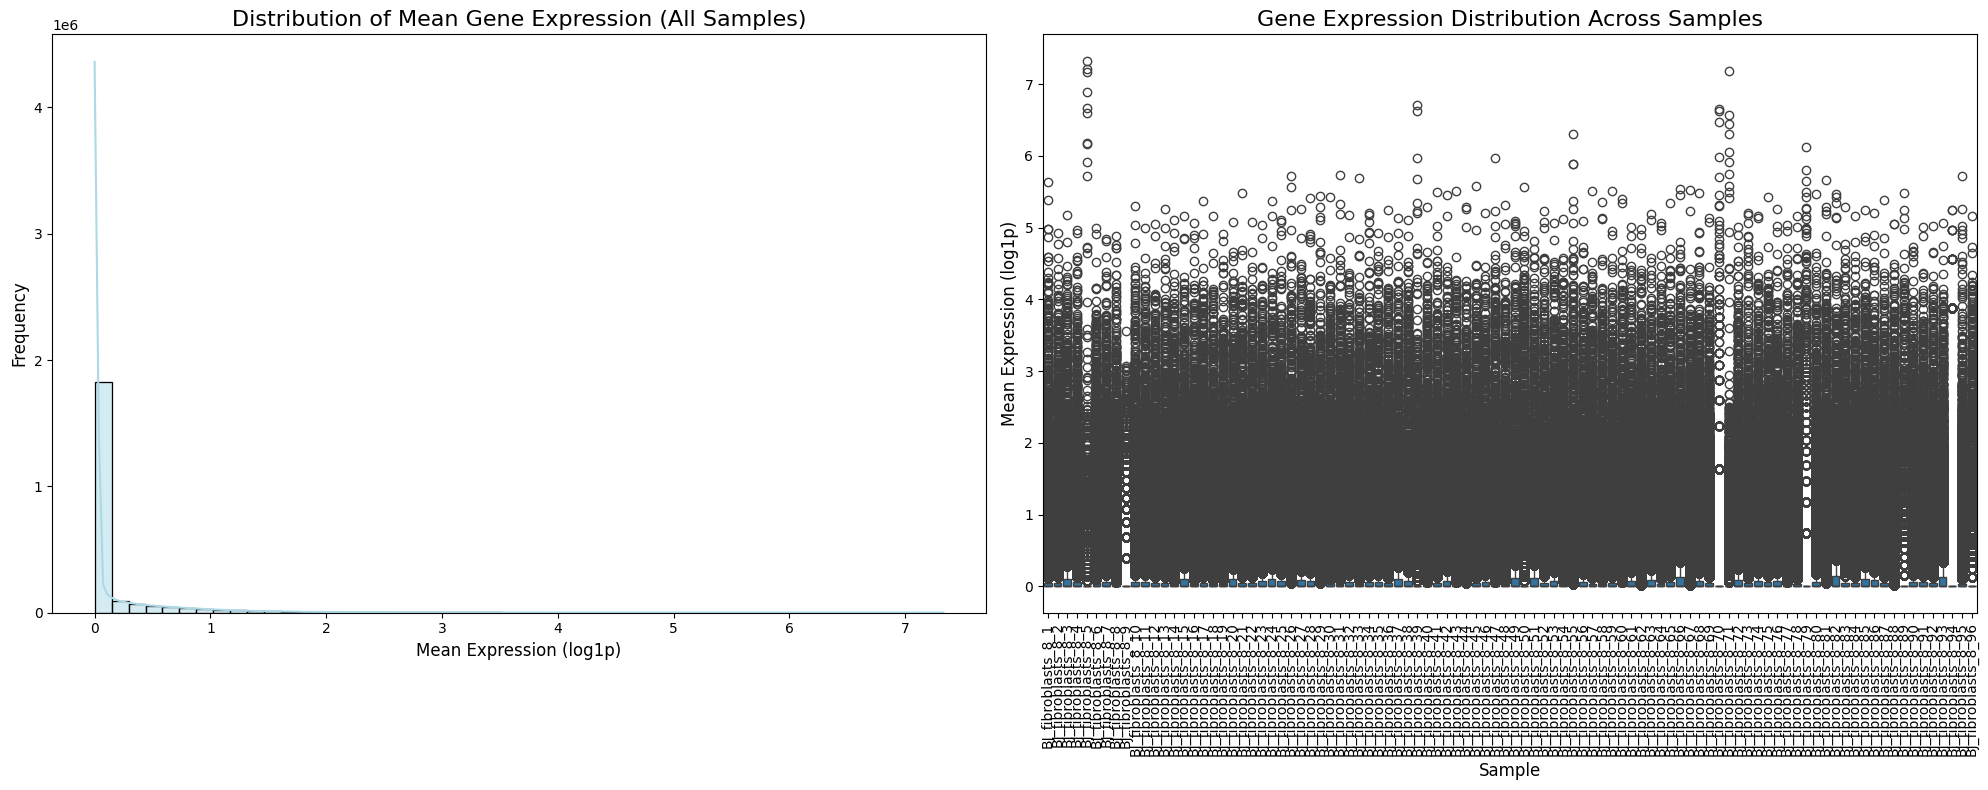

In [27]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse

# Load the data
adata = sc.read_h5ad("combined_output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate gene statistics for each sample
sample_means = []
for sample in adata.obs['sample'].unique():
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        mean_exp = sample_data.X.mean(axis=0).A1
    else:
        mean_exp = sample_data.X.mean(axis=0)
    sample_means.append(pd.DataFrame({'mean_expression': mean_exp, 'sample': sample}))

sample_means_df = pd.concat(sample_means)

# Visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Distribution of gene expression
sns.histplot(sample_means_df['mean_expression'], bins=50, kde=True, ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title('Distribution of Mean Gene Expression (All Samples)', fontsize=16)
ax1.set_xlabel('Mean Expression (log1p)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Box plot of gene expression across samples
sns.boxplot(data=sample_means_df, x='sample', y='mean_expression', ax=ax2)
ax2.set_title('Gene Expression Distribution Across Samples', fontsize=16)
ax2.set_xlabel('Sample', fontsize=12)
ax2.set_ylabel('Mean Expression (log1p)', fontsize=12)
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('gene_expression_summary.png', dpi=300, bbox_inches='tight')
print("\nSaved gene expression summary plot to 'gene_expression_summary.png'")

# Calculate overall top expressed genes
overall_mean_expression = sample_means_df.groupby(sample_means_df.index)['mean_expression'].mean()
top_genes = overall_mean_expression.sort_values(ascending=False).head(20)

# Print top genes info
print("\nTop 20 Expressed Genes:")
print(top_genes)

# Heatmap visualization


Saved top genes heatmap to 'top_genes_heatmap.png'

Top 20 Expressed Genes:
ENSG00000156508    4.991411
ENSG00000210082    4.919792
ENSG00000182718    4.430543
ENSG00000198712    4.280599
ENSG00000211459    4.005096
ENSG00000198886    3.970011
ENSG00000075624    3.968347
ENSG00000111640    3.913457
ENSG00000089157    3.889854
ENSG00000198804    3.874302
ENSG00000198727    3.872035
ENSG00000184009    3.820932
ENSG00000134333    3.788573
ENSG00000100316    3.759215
ENSG00000087086    3.689880
ENSG00000205542    3.648666
ENSG00000181163    3.601406
ENSG00000198899    3.593795
ENSG00000142541    3.575606
ENSG00000149273    3.571275
dtype: float32


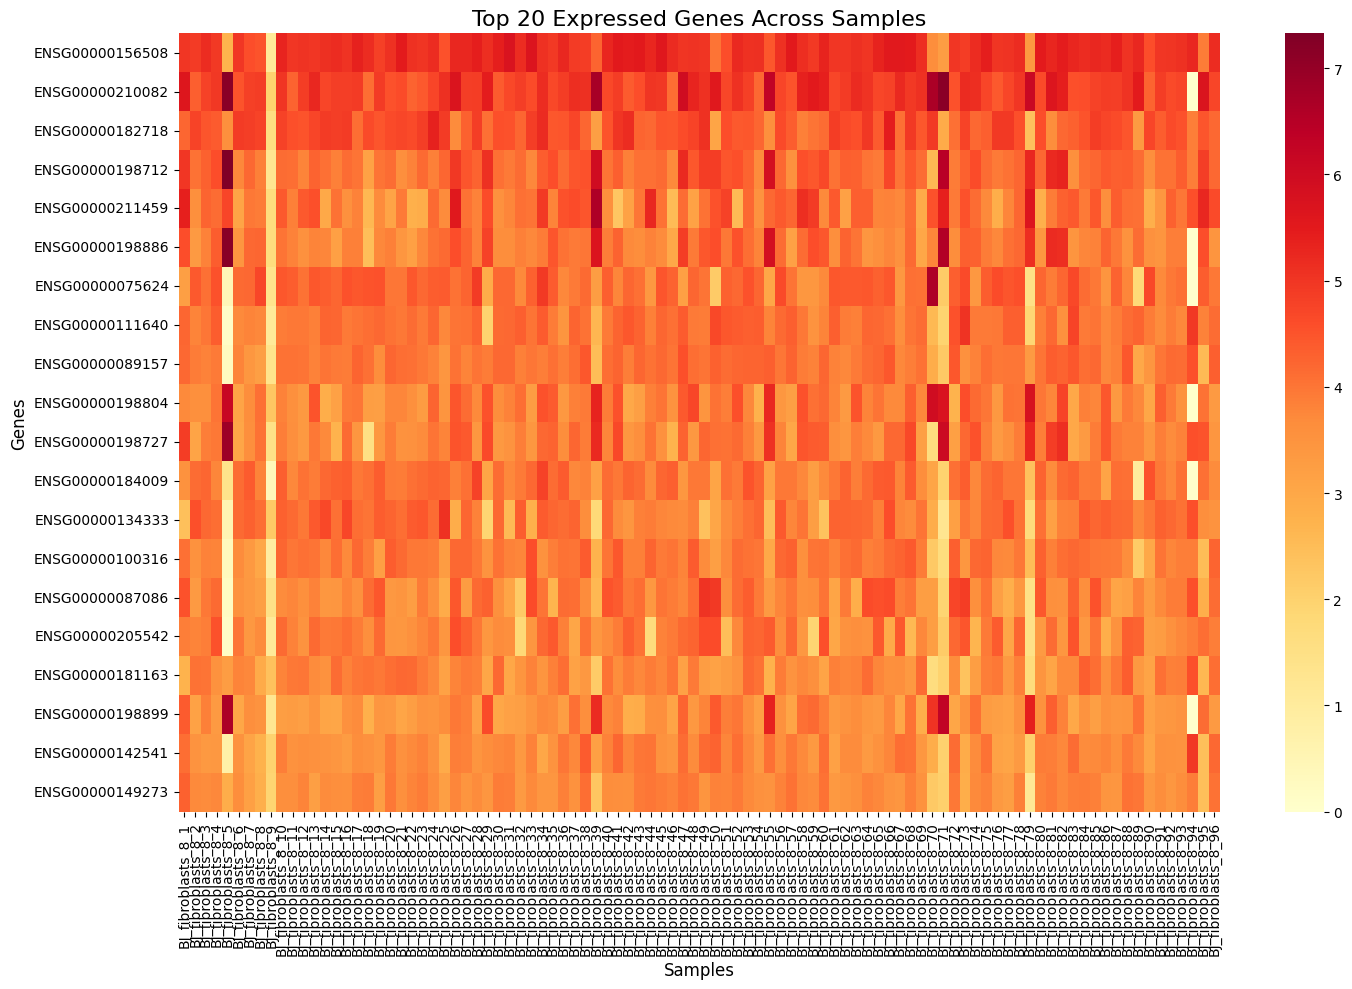

In [28]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import sparse

# Load the data
adata = sc.read_h5ad("combined_output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate mean expression for each gene in each sample
sample_means = []
for sample in adata.obs['sample'].unique():
    sample_data = adata[adata.obs['sample'] == sample]
    if sparse.issparse(sample_data.X):
        mean_exp = sample_data.X.mean(axis=0).A1
    else:
        mean_exp = sample_data.X.mean(axis=0)
    sample_means.append(pd.Series(mean_exp, index=adata.var_names, name=sample))

expression_df = pd.concat(sample_means, axis=1)

# Get top 20 genes based on overall mean expression
top_genes = expression_df.mean(axis=1).sort_values(ascending=False).head(20).index

# Create heatmap data
heatmap_data = expression_df.loc[top_genes]

# Create heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', xticklabels=True, yticklabels=True)
plt.title('Top 20 Expressed Genes Across Samples', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('top_genes_heatmap.png', dpi=300, bbox_inches='tight')
print("\nSaved top genes heatmap to 'top_genes_heatmap.png'")

# Print top genes info
print("\nTop 20 Expressed Genes:")
print(heatmap_data.mean(axis=1).sort_values(ascending=False))

# T-SNE visualization


Saved t-SNE plot to 'tsne_plot_96_samples.png'

t-SNE Statistics:
          t-SNE1     t-SNE2
count  96.000000  96.000000
mean   -1.310091   0.014708
std     1.675278   1.258020
min    -5.606439  -2.852801
25%    -2.443699  -0.966812
50%    -1.455828   0.128524
75%    -0.058188   0.890677
max     2.265212   2.807742


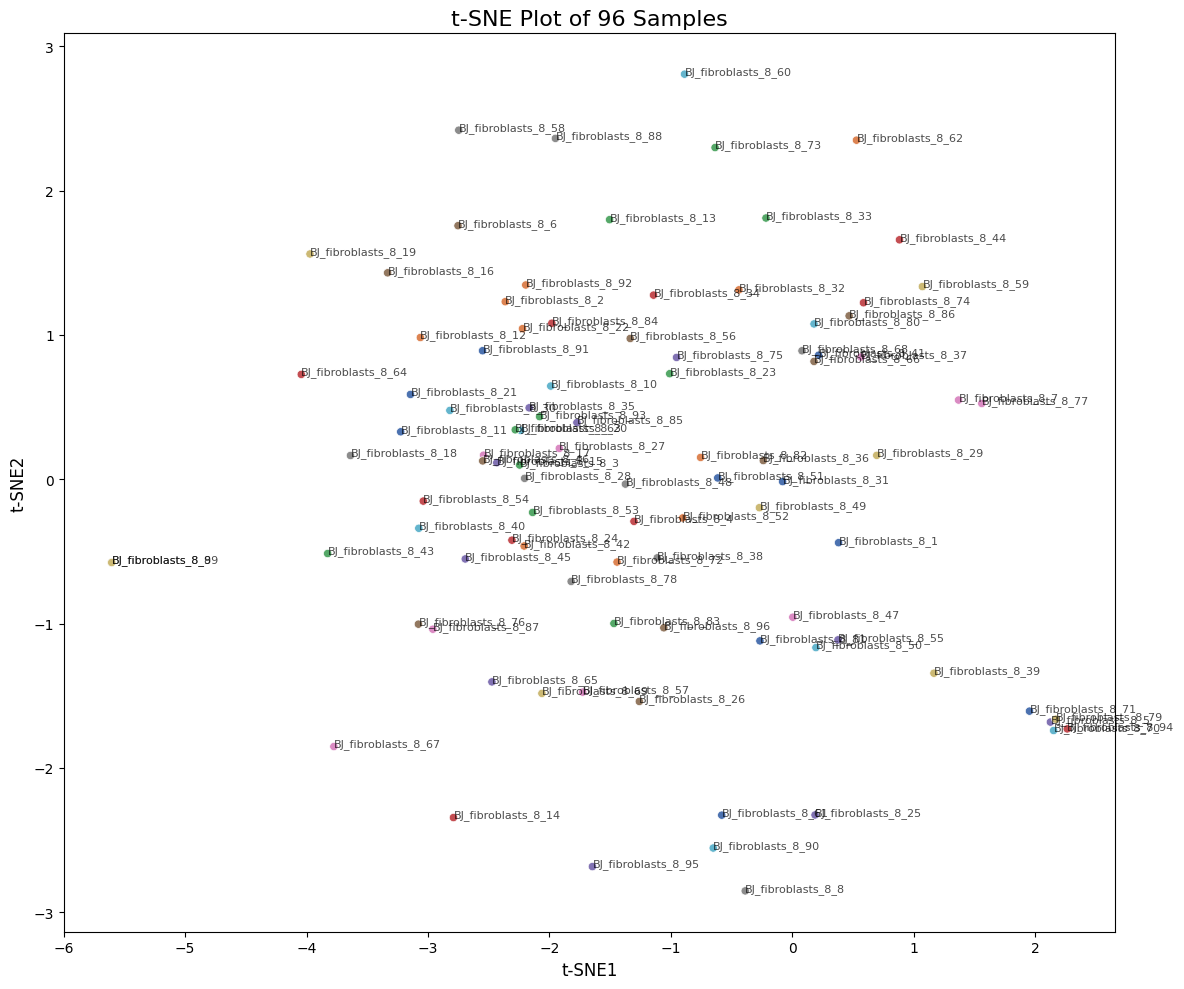

In [29]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Load the data
adata = sc.read_h5ad("combined_output.h5ad")

# Preprocess: Filter out genes with zero expression across all cells
sc.pp.filter_genes(adata, min_cells=1)

# Normalize the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Calculate mean expression for each gene in each sample
sample_means = []
for sample in adata.obs['sample'].unique():
    sample_data = adata[adata.obs['sample'] == sample]
    mean_exp = sample_data.X.mean(axis=0)
    if isinstance(mean_exp, np.matrix):
        mean_exp = mean_exp.A1
    sample_means.append(mean_exp)

# Create a DataFrame with mean expression values
expression_df = pd.DataFrame(sample_means, index=adata.obs['sample'].unique(), columns=adata.var_names)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(expression_df)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['Sample'] = expression_df.index

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='Sample', palette='deep', legend=False)
plt.title('t-SNE Plot of 96 Samples', fontsize=16)
plt.xlabel('t-SNE1', fontsize=12)
plt.ylabel('t-SNE2', fontsize=12)

# Add labels for each point
for i, txt in enumerate(tsne_df['Sample']):
    plt.annotate(txt, (tsne_df['t-SNE1'].iloc[i], tsne_df['t-SNE2'].iloc[i]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.savefig('tsne_plot_96_samples.png', dpi=300, bbox_inches='tight')
print("\nSaved t-SNE plot to 'tsne_plot_96_samples.png'")

# Print some statistics
print("\nt-SNE Statistics:")
print(tsne_df.describe())

In [30]:
import scanpy as sc
import pandas as pd

# Load the AnnData object
adata = sc.read_h5ad("combined_output.h5ad")

# Create celltype_dict using dictionary comprehension
celltype_dict = {f'BJ_fibroblasts_8_{i}': 'Fibroblast' for i in range(1, 97)}

# Add the 'Celltype' column to adata.obs
adata.obs['Celltype'] = adata.obs['sample'].map(celltype_dict)

# Verify the addition
print("Sample of updated obs DataFrame:")
print(adata.obs[['sample', 'Celltype']].head())

# Print unique cell types
print("\nUnique cell types:")
print(adata.obs['Celltype'].unique())

# Print summary of cell types
print("\nCell type summary:")
print(adata.obs['Celltype'].value_counts())

# Save the updated AnnData object
output_file = "combined_output_with_celltype.h5ad"
adata.write_h5ad(output_file)
print(f"\nSaved updated AnnData object to {output_file}")

# Optional: Create a t-SNE plot colored by cell type
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Perform t-SNE on gene expression data
gene_exp = adata.X.toarray() if scipy.sparse.issparse(adata.X) else adata.X
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(gene_exp)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])
tsne_df['Celltype'] = adata.obs['Celltype']

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='Celltype', palette='deep')
plt.title('t-SNE Plot Colored by Cell Type', fontsize=16)
plt.xlabel('t-SNE1', fontsize=12)
plt.ylabel('t-SNE2', fontsize=12)

# Save the plot
plot_file = "tsne_plot_celltype.png"
plt.savefig(plot_file, dpi=300, bbox_inches='tight')
print(f"Saved t-SNE plot to {plot_file}")

plt.close()

print("\nProcess completed successfully.")

Sample of updated obs DataFrame:
                 sample    Celltype
0-0  BJ_fibroblasts_8_1  Fibroblast
0-1  BJ_fibroblasts_8_2  Fibroblast
0-2  BJ_fibroblasts_8_3  Fibroblast
0-3  BJ_fibroblasts_8_4  Fibroblast
0-4  BJ_fibroblasts_8_5  Fibroblast

Unique cell types:
['Fibroblast']

Cell type summary:
Celltype
Fibroblast    96
Name: count, dtype: int64

Saved updated AnnData object to combined_output_with_celltype.h5ad


/var/folders/xy/gh98jw095c31f3s056dxk20c0000gn/T/ipykernel_65895/358354835.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='Celltype', palette='deep')


Saved t-SNE plot to tsne_plot_celltype.png

Process completed successfully.


In [66]:
import scanpy as sc
import pandas as pd

# Load the AnnData object
adata = sc.read_h5ad("combined_data.h5ad")


print("AnnData structure:")
print(adata)

print("\nShape of adata.X:", adata.X.shape)
print("Number of genes (adata.n_vars):", adata.n_vars)
print("Number of cells (adata.n_obs):", adata.n_obs)

print("\nFirst few var names:")
print(adata.var_names[:10])

print("\nColumns in var:")
print(adata.var.columns)

if scipy.sparse.issparse(adata.X):
    print("\nadata.X is sparse. Density:", adata.X.nnz / (adata.X.shape[0] * adata.X.shape[1]))
else:
    print("\nadata.X is dense")

print("\nSample of adata.X:")
print(adata.X[:5, :5])

AnnData structure:
AnnData object with n_obs × n_vars = 6061440 × 1
    obs: 'sample', 'batch'

Shape of adata.X: (6061440, 1)
Number of genes (adata.n_vars): 1
Number of cells (adata.n_obs): 6061440

First few var names:
Index(['0'], dtype='object')

Columns in var:
Index([], dtype='object')

adata.X is sparse. Density: 0.10793870763382958

Sample of adata.X:
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 2 stored elements and shape (5, 1)>
  Coords	Values
  (1, 0)	1.0
  (3, 0)	1.0


In [57]:
import scanpy as sc
import json
from pathlib import Path
import pandas as pd

# Load your AnnData object
adata = sc.read_h5ad("GSE100344_scGPT_ready_updated_v2.h5ad")

# Load the model's vocabulary
model_dir = Path("schuman")  # Replace with your model directory path
vocab_file = model_dir / "vocab.json"

with open(vocab_file, 'r') as f:
    model_vocab = json.load(f)

# Get gene names from your data
data_genes = set(adata.var_names)

# Get gene names from the model vocabulary (excluding special tokens)
model_genes = set(model_vocab.keys()) - {'<pad>', '<eos>', '<unk>', '<mask>'}  # Adjust special tokens as needed

# Compare vocabularies
matching_genes = data_genes.intersection(model_genes)
only_in_data = data_genes - model_genes
only_in_model = model_genes - data_genes

# Print results
print(f"Total genes in your data: {len(data_genes)}")
print(f"Total genes in model vocabulary: {len(model_genes)}")
print(f"Matching genes: {len(matching_genes)}")
print(f"Genes only in your data: {len(only_in_data)}")
print(f"Genes only in model vocabulary: {len(only_in_model)}")

# Calculate match percentage
match_percentage = (len(matching_genes) / len(data_genes)) * 100
print(f"Match percentage: {match_percentage:.2f}%")

# Display some examples
print("\nExample of matching genes:")
print(list(matching_genes)[:10])
print("\nExample of genes only in your data:")
print(list(only_in_data)[:10])
print("\nExample of genes only in model vocabulary:")
print(list(only_in_model)[:10])

# Optional: Save detailed results to CSV
results_df = pd.DataFrame({
    'gene': list(data_genes),
    'in_data': True,
    'in_model': [gene in model_genes for gene in data_genes]
})

results_df.to_csv("gene_vocabulary_comparison.csv", index=False)
print("\nDetailed results saved to 'gene_vocabulary_comparison.csv'")

Total genes in your data: 25265
Total genes in model vocabulary: 60696
Matching genes: 0
Genes only in your data: 25265
Genes only in model vocabulary: 60696
Match percentage: 0.00%

Example of matching genes:
[]

Example of genes only in your data:
['ENSG00000068745', 'ENSG00000105323', 'ENSG00000074181', 'ENSG00000280162', 'ENSG00000287522', 'ENSG00000174827', 'ENSG00000196865', 'ENSG00000175198', 'ENSG00000267422', 'ENSG00000152284']

Example of genes only in model vocabulary:
['PHTF1', 'CDY1', 'AMY1C', 'MIR3127', 'MFSD4B', 'LINC02668', 'LINC01299', 'WDR5', 'MT-TH', 'AC114273.3']

Detailed results saved to 'gene_vocabulary_comparison.csv'


In [39]:
import scanpy as sc
import pandas as pd
import numpy as np

# Load your AnnData object
adata = sc.read_h5ad("GSE100344_scGPT_ready_updated_v2.h5ad")

# Print some information before the change
print("Before change:")
print(f"Number of variables: {adata.n_vars}")
print("First few var_names:")
print(adata.var_names[:5])
print("\nFirst few gene_names:")
print(adata.var['gene_name'][:5])

# Check for missing values in gene_name
if adata.var['gene_name'].isnull().any():
    print(f"\nWarning: {adata.var['gene_name'].isnull().sum()} missing values in gene_name")
    # Fill missing values with original var_names
    adata.var.loc[adata.var['gene_name'].isnull(), 'gene_name'] = adata.var_names[adata.var['gene_name'].isnull()]

# Check for duplicates in gene_name
duplicates = adata.var['gene_name'].duplicated()
if duplicates.any():
    print(f"\nWarning: {duplicates.sum()} duplicate gene names found")
    # Make gene names unique by appending a suffix
    adata.var['gene_name'] = adata.var['gene_name'] + '_' + adata.var.groupby('gene_name').cumcount().astype(str)

# Replace var_names with gene_name
adata.var_names = adata.var['gene_name']

# Ensure var_names are unique (this is crucial for AnnData)
adata.var_names_make_unique()

# Print some information after the change
print("\nAfter change:")
print(f"Number of variables: {adata.n_vars}")
print("First few var_names (now gene names):")
print(adata.var_names[:5])

# Save the updated AnnData object
adata.write_h5ad("updated_data_with_gene_names.h5ad")
print("\nUpdated AnnData saved to 'updated_data_with_gene_names.h5ad'")

# Optional: Check if any original var_names were different from gene_names
original_var_names = adata.var.index
different = original_var_names != adata.var['gene_name']
if different.any():
    print(f"\n{different.sum()} var_names were different from gene_names")
    print("Example of changes (original -> new):")
    changes = pd.DataFrame({'original': original_var_names, 'new': adata.var['gene_name']})
    print(changes[different].head())


adata.var['gene_name']

Before change:
Number of variables: 25265
First few var_names:
Index(['ENSG00000157911', 'ENSG00000142655', 'ENSG00000171621',
       'ENSG00000142583', 'ENSG00000226457'],
      dtype='object', name='Geneid')

First few gene_names:
Geneid
ENSG00000157911    ENSG00000157911
ENSG00000142655    ENSG00000142655
ENSG00000171621    ENSG00000171621
ENSG00000142583    ENSG00000142583
ENSG00000226457    ENSG00000226457
Name: gene_name, dtype: object

After change:
Number of variables: 25265
First few var_names (now gene names):
Index(['ENSG00000157911', 'ENSG00000142655', 'ENSG00000171621',
       'ENSG00000142583', 'ENSG00000226457'],
      dtype='object', name='gene_name')

Updated AnnData saved to 'updated_data_with_gene_names.h5ad'


gene_name
ENSG00000157911    ENSG00000157911
ENSG00000142655    ENSG00000142655
ENSG00000171621    ENSG00000171621
ENSG00000142583    ENSG00000142583
ENSG00000226457    ENSG00000226457
                        ...       
ENSG00000273748    ENSG00000273748
ENSG00000277196    ENSG00000277196
ENSG00000278817    ENSG00000278817
ENSG00000271254    ENSG00000271254
ENSG00000275405    ENSG00000275405
Name: gene_name, Length: 25265, dtype: object

In [47]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

# Load your AnnData object
adata = sc.read_h5ad("GSE100344_scGPT_ready_updated_v2.h5ad")

# Print information about the AnnData object
print(f"AnnData object: {adata.shape[0]} cells, {adata.shape[1]} genes")

# Display a sample of adata.X
print("\nSample of adata.X (first 5 cells, first 5 genes):")
x_sample = adata.X[:5, :5]
print(x_sample.toarray() if sparse.issparse(x_sample) else x_sample)
# Print information about the AnnData object
print(f"AnnData object: {adata.shape[0]} cells, {adata.shape[1]} genes")


# Get the corresponding gene names from var.gene_names
gene_names = adata.var['gene_name'].iloc[:100]

print(gene_names)


AnnData object: 475 cells, 25265 genes

Sample of adata.X (first 5 cells, first 5 genes):
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.15547901 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
AnnData object: 475 cells, 25265 genes
Geneid
ENSG00000157911    ENSG00000157911
ENSG00000142655    ENSG00000142655
ENSG00000171621    ENSG00000171621
ENSG00000142583    ENSG00000142583
ENSG00000226457    ENSG00000226457
                        ...       
ENSG00000162385    ENSG00000162385
ENSG00000116652    ENSG00000116652
ENSG00000123080    ENSG00000123080
ENSG00000225675    ENSG00000225675
ENSG00000280317    ENSG00000280317
Name: gene_name, Length: 100, dtype: object


In [53]:
import scanpy as sc
import pandas as pd

# Load your AnnData object
adata = sc.read_h5ad("dante_combined_output_with_celltype.h5ad.h5ad")

# Get the first 100 gene names from var.gene_name
gene_names = adata.obs['Celltype'].iloc[:100]

# Print the gene names
print("First 100 gene names:")
print(gene_names)

# Create a DataFrame with the gene names
gene_names_df = pd.DataFrame({'gene_name': gene_names})

# Save the DataFrame to a CSV file
csv_filename = "first_100_gene_names.csv"
gene_names_df.to_csv(csv_filename, index=False)

print(f"\nGene names have been saved to {csv_filename}")

# Optional: Display the first few rows of the saved CSV
print("\nFirst few rows of the saved CSV:")
print(pd.read_csv(csv_filename).head())

# Additional information about the gene_name column
print("\nInformation about the gene_name column:")
print(adata.var['gene_name'].describe())

# Check for any null values in gene_name
null_count = adata.var['gene_name'].isnull().sum()
print(f"\nNumber of null values in gene_name: {null_count}")

# Check for duplicate gene names
duplicate_count = adata.var['gene_name'].duplicated().sum()
print(f"Number of duplicate gene names: {duplicate_count}")

if duplicate_count > 0:
    print("\nExample of duplicate gene names:")
    print(adata.var['gene_name'][adata.var['gene_name'].duplicated(keep=False)].head())

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'dante_combined_output_with_celltype.h5ad.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Total number of genes: 63140
Number of genes with zero expression: 39686
Percentage of genes with zero expression: 62.85%

First 10 genes with zero expression:
Index(['ENSG00000228037', 'ENSG00000284616', 'ENSG00000260972',
       'ENSG00000224340', 'ENSG00000226374', 'ENSG00000229280',
       'ENSG00000232596', 'ENSG00000235054', 'ENSG00000149527',
       'ENSG00000284739'],
      dtype='object')

List of zero expression genes saved to zero_expression_genes.csv

Expression sum statistics:
count     63140.000000
mean        744.268860
std        7975.532715
min           0.000000
25%           0.000000
50%           0.000000
75%          19.000000
max      824600.000000
dtype: float64

Gene expression distribution plot saved as 'gene_expression_distribution.png'


TypeError: 'tuple' object is not callable

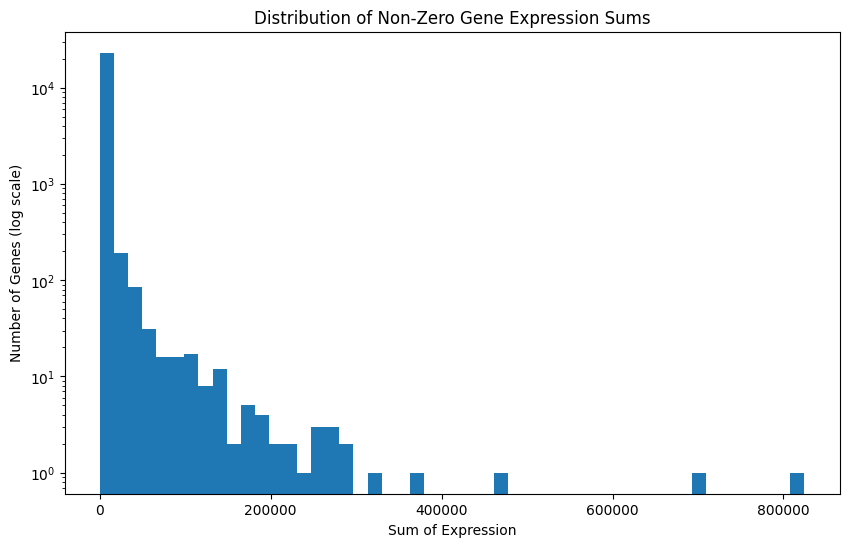

In [61]:
import scanpy as sc
import numpy as np
from scipy import sparse
import pandas as pd

# Load your AnnData object
adata = sc.read_h5ad("dante_combined_output_with_celltype.h5ad")

# Function to detect zero expression genes
def detect_zero_expression_genes(adata):
    if sparse.issparse(adata.X):
        # For sparse matrix
        gene_sums = adata.X.sum(axis=0).A1
    else:
        # For dense matrix
        gene_sums = adata.X.sum(axis=0)
    
    zero_expression_genes = gene_sums == 0
    return zero_expression_genes

# Detect zero expression genes
zero_exp_genes = detect_zero_expression_genes(adata)

# Count of zero expression genes
zero_exp_count = np.sum(zero_exp_genes)

print(f"Total number of genes: {adata.n_vars}")
print(f"Number of genes with zero expression: {zero_exp_count}")
print(f"Percentage of genes with zero expression: {zero_exp_count / adata.n_vars * 100:.2f}%")

# Get names of zero expression genes
zero_exp_gene_names = adata.var_names[zero_exp_genes]

print("\nFirst 10 genes with zero expression:")
print(zero_exp_gene_names[:10])

# Optional: Save zero expression genes to CSV
zero_exp_df = pd.DataFrame({'gene_name': zero_exp_gene_names})
csv_filename = "zero_expression_genes.csv"
zero_exp_df.to_csv(csv_filename, index=False)
print(f"\nList of zero expression genes saved to {csv_filename}")

# Additional analysis: Expression distribution
if sparse.issparse(adata.X):
    gene_sums = adata.X.sum(axis=0).A1
else:
    gene_sums = adata.X.sum(axis=0)

print("\nExpression sum statistics:")
print(pd.Series(gene_sums).describe())

# Optional: Histogram of gene expression sums
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(gene_sums[gene_sums > 0], bins=50, log=True)
plt.title("Distribution of Non-Zero Gene Expression Sums")
plt.xlabel("Sum of Expression")
plt.ylabel("Number of Genes (log scale)")
plt.savefig("gene_expression_distribution.png")
print("\nGene expression distribution plot saved as 'gene_expression_distribution.png'")

adata.X.shape()

In [4]:
import scanpy as sc
import pandas as pd

# Load your AnnData object
adata = sc.read_h5ad("final_v1.h5ad")

# Check the shape of adata.var
print(f"Shape of adata.var: {adata.var.shape}")
print(f"Number of genes (rows): {adata.var.shape[0]}")
print(f"Number of attributes/columns: {adata.var.shape[1]}")
print(type(adata.X))

# Display information about adata.var
print("\nInformation about adata.var:")
print(adata.var.info())

# Display the column names of adata.var
print("\nColumns in adata.var:")
print(adata.var.columns)

# Display the first few rows of adata.var
print("\nFirst few rows of adata.var:")
print(adata.var.head())

# Check for any null values
null_counts = adata.var.isnull().sum()
print("\nNull value counts in each column:")
print(null_counts[null_counts > 0])  # Only show columns with null values

# Check data types of columns
print("\nData types of columns in adata.var:")
print(adata.var.dtypes)

# If 'gene_name' column exists, show some statistics
if 'gene_name' in adata.var.columns:
    print("\nStatistics for 'gene_name' column:")
    print(adata.var['gene_name'].describe())
    
    # Check for duplicate gene names
    duplicate_genes = adata.var['gene_name'].duplicated().sum()
    print(f"\nNumber of duplicate gene names: {duplicate_genes}")

# Check if index (var_names) is unique
print(f"\nIs the index (var_names) unique? {adata.var.index.is_unique}")

# If index is not unique, show some examples of duplicates
if not adata.var.index.is_unique:
    print("\nExamples of duplicate indices:")
    print(adata.var.index[adata.var.index.duplicated(keep=False)].sort_values()[:10])

Shape of adata.var: (63140, 1)
Number of genes (rows): 63140
Number of attributes/columns: 1
<class 'scipy.sparse._csr.csr_matrix'>

Information about adata.var:
<class 'pandas.core.frame.DataFrame'>
Index: 63140 entries, ENSG00000228037 to U1-5
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gene_id  63140 non-null  object
dtypes: object(1)
memory usage: 3.0+ MB
None

Columns in adata.var:
Index(['gene_id'], dtype='object')

First few rows of adata.var:
                         gene_id
ENSG00000228037  ENSG00000228037
PRDM16           ENSG00000142611
ENSG00000284616  ENSG00000284616
PEX10            ENSG00000157911
ENSG00000260972  ENSG00000260972

Null value counts in each column:
Series([], dtype: int64)

Data types of columns in adata.var:
gene_id    object
dtype: object

Is the index (var_names) unique? True


In [10]:
# Basic preprocessing
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)